In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("preprocessd_data - preprocessd_data.csv")
data.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,weekly_max_night_mins,videos_watched,customer_support_calls,churn
0,0,-0.264643,-0.946659,0,0,-1.508785,0.722258,-0.944404,-1.403000,-0.415473,0
1,0,0.029654,1.235009,0,0,0.304821,-0.901748,-0.688523,-0.599124,0.347522,0
2,0,2.580235,0.658246,0,0,-2.266627,0.613991,-0.483818,-1.403000,2.636507,1
3,0,-1.441834,0.783629,0,1,0.638123,-0.252146,0.079121,-0.197185,1.110517,0
4,0,0.127754,2.288228,0,0,-0.333851,0.253101,-0.893228,1.008630,-0.415473,0


In [3]:
X = data.drop('churn', axis=1)
y = data['churn']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=0)
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(2724, 10)
(682, 10)
(2724,)
(682,)


In [5]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [6]:
y_predictions=DT.predict(X_test)
y_predictions

array([1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,

In [7]:
print(y_test.values[:10])
print(y_predictions[:10])

[1 0 1 1 1 0 0 1 1 1]
[1 0 1 0 1 0 0 0 1 0]


In [8]:

from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score,ConfusionMatrixDisplay,roc_curve,auc,confusion_matrix,roc_auc_score

In [9]:
acc=accuracy_score(y_test,y_predictions)

In [10]:
pre=precision_score(y_test,y_predictions)

In [11]:
rec=recall_score(y_test,y_predictions)

In [12]:
f1= f1_score(y_test,y_predictions)

In [13]:
confusion_matrix(y_test,y_predictions)

array([[305,  30],
       [ 33, 314]], dtype=int64)

In [14]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predictions).ravel()

In [15]:
print("True postives:",tp)
print("True Negatives:",tp)
print("False postives:",fp)
print("False Negatives:",fn)
print("Accuracy :",acc)
print('Precision:',pre)
print('recall:',rec)
print('f1:',f1)

True postives: 314
True Negatives: 314
False postives: 30
False Negatives: 33
Accuracy : 0.907624633431085
Precision: 0.9127906976744186
recall: 0.9048991354466859
f1: 0.9088277858176556


**ROC-AUC curve**
- Reciever operative charctaeristics
- It is graph between TPR vs FPR
- Ture postive rate vs False positive rate
- Sensitivity vs (1-specificity)
- x-axis :FPR
- y-axis :TPR
- in order to draw the ROC curve we required probabilities
- For every input observation model will give one prediction
- Before giving the prediction model give probabilities
- probability to 

In [16]:
dt_pred=DT.predict_proba(X_test)
# the below output is prediction of each X_test sample
# take first output [0,1]
# 0 indicates 0.0 probability
# 1 indicates 1.0 probability
# no  yes    ans prediction
# 0.0   1.0 ===> yes  1
# 1.0   0.0 ====> no   0
# 0.0   1.0 ====> yes  1

In [17]:
l=[1,0]
l.index(max(l))

0

In [18]:
prob_df = pd.DataFrame(DT.predict_proba(X_test),columns = ['No_Probability','Yes_Probability'])
prob_df['Final_Prediction'] = [list(i).index(max(i)) for i in dt_pred]
prob_df['Final_Output'] = prob_df['Final_Prediction'].map({1:"Yes",0:"No"})
prob_df

,No_Probability,Yes_Probability,Final_Prediction,Final_Output
0,0.0,1.0,1,Yes
1,1.0,0.0,0,No
2,0.0,1.0,1,Yes
3,1.0,0.0,0,No
4,0.0,1.0,1,Yes
...,...,...,...,...
677,1.0,0.0,0,No
678,0.0,1.0,1,Yes
679,0.0,1.0,1,Yes
680,1.0,0.0,0,No


- roc curve 

In [19]:
dt_pos_prod=dt_pred[:,1]
dt_pos_prod

array([1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 0., 1.

In [20]:
roc_auc_score(y_test,dt_pos_prod)

0.9076734483203578

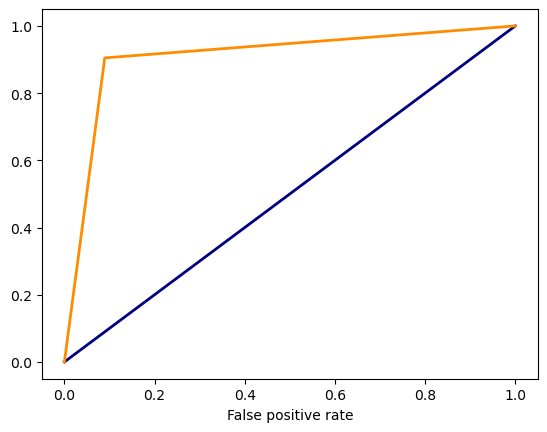

In [22]:
from sklearn.metrics import roc_curve
fpr, tpr,thresholds = roc_curve(y_test,dt_pos_prod)
plt.plot([0,1],[0,1],color ="navy",lw=2,label="Random-Model")
plt.plot(fpr, tpr,color="darkorange",lw=2,label="Decision Tree model")
plt.xlabel("False positive rate")
plt.show()